In [4]:
# Load your dataset
import os
os.getcwd()

'/Users/sergiogomis/Desktop/Master/Curso/Capstone/Final Project'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df_balanced = pd.read_csv("loan_balanced2.csv", low_memory=False)

In [12]:
# Drop rows with NaN values in the target column
df_balanced = df_balanced.dropna(subset=['loan_status'])

In [15]:
df_balanced.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_status
0,30000.0,60,12.29,671.74,C,Sr. Program Manager,< 1 year,MORTGAGE,150000.0,Source Verified,...,0,0,0,0,1,0,0,0,0,0
1,35000.0,36,7.89,1095.00,A,assistant store director,10+ years,MORTGAGE,165000.0,Verified,...,0,0,0,0,1,0,0,0,0,0
2,27000.0,36,10.99,883.82,B,owner,2 years,MORTGAGE,60000.0,Source Verified,...,0,0,0,0,1,0,0,0,0,0
3,22000.0,36,11.53,725.79,B,Accounts payable,< 1 year,MORTGAGE,60000.0,Source Verified,...,0,0,0,0,1,0,0,0,0,0
4,9750.0,36,12.99,328.47,B,Financial Advisor,10+ years,OWN,400000.0,Verified,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_balanced = df_balanced.drop(columns=['title', 'revol_bal', 'revol_util', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt' , 'last_credit_pull_d', 'policy_code'])

In [21]:
df_balanced.shape

(4063, 42)

In [24]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_amnt                  4063 non-null   float64
 1   term                       4063 non-null   int64  
 2   int_rate                   4063 non-null   float64
 3   installment                4063 non-null   float64
 4   grade                      4063 non-null   object 
 5   emp_title                  3812 non-null   object 
 6   emp_length                 3846 non-null   object 
 7   home_ownership             4063 non-null   object 
 8   annual_inc                 4063 non-null   float64
 9   verification_status        4063 non-null   object 
 10  issue_d                    4063 non-null   object 
 11  pymnt_plan                 4063 non-null   object 
 12  purpose                    4063 non-null   object 
 13  addr_state                 4063 non-null   objec

In [27]:
# Identify the target and features
X = df_balanced.drop('loan_status', axis=1)
y = df_balanced['loan_status']

In [30]:
# Select only numeric columns
numeric_columns = df_balanced.select_dtypes(include='number').columns

In [33]:
# Fill NaN values with the mean of the respective numeric columns
df_balanced[numeric_columns] = df_balanced[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

In [36]:
# Verify that NaN values are replaced
print(df_balanced.isna().sum())

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_title                     251
emp_length                    217
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
pymnt_plan                      0
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
mths_since_last_delinq          0
mths_since_last_record          0
open_acc                        0
total_acc                       0
last_pymnt_d                   75
next_pymnt_d                  791
application_type                0
annual_inc_joint                0
verification_status_joint    4062
acc_now_delinq                  0
tot_cur_bal                     0
duration_numeric                0
grade_A                         0
grade_B       

In [39]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [42]:
# import the class
from sklearn.linear_model import LogisticRegression

In [45]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

In [48]:
# Convert categorical variables to numeric using one-hot encoding
df_balanced = pd.get_dummies(df_balanced)

In [51]:
# Verify the DataFrame after encoding
print(df_balanced.head())

   loan_amnt  term  int_rate  installment  annual_inc    dti  delinq_2yrs  \
0    30000.0    60     12.29       671.74    150000.0  15.25          0.0   
1    35000.0    36      7.89      1095.00    165000.0  17.64          0.0   
2    27000.0    36     10.99       883.82     60000.0  21.80          0.0   
3    22000.0    36     11.53       725.79     60000.0  21.68          0.0   
4     9750.0    36     12.99       328.47    400000.0   0.50          1.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  ...  \
0               32.000000               71.783439      11.0  ...   
1               34.407389               71.783439      20.0  ...   
2               36.000000               71.783439       9.0  ...   
3               34.407389               71.783439      14.0  ...   
4               13.000000               71.783439       4.0  ...   

   next_pymnt_d_Dec-2010  next_pymnt_d_Feb-2016  next_pymnt_d_Jan-2016  \
0                  False                   True       

In [54]:
# Fill NaN values with the mean of the respective columns
df_balanced = df_balanced.apply(lambda x: x.fillna(x.mean()), axis=0)

# Verify that NaN values are replaced
print(df_balanced.isna().sum())

loan_amnt                             0
term                                  0
int_rate                              0
installment                           0
annual_inc                            0
                                     ..
next_pymnt_d_Sep-2011                 0
next_pymnt_d_Sep-2012                 0
application_type_INDIVIDUAL           0
application_type_JOINT                0
verification_status_joint_Verified    0
Length: 3156, dtype: int64


In [57]:
# Define features and target
X = df_balanced.drop(columns=['loan_status'])  # Adjust 'loan_status' to your target column
y = df_balanced['loan_status']

In [60]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [66]:
# Verify the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3047, 3155) (1016, 3155) (3047,) (1016,)


In [69]:
# Instantiate the model with increased max_iter
logreg = LogisticRegression(random_state=16, max_iter=1000)

In [72]:
# Fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [75]:
# Verify the model
print(logreg)

LogisticRegression(max_iter=1000, random_state=16)


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [81]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [87]:
# Instantiate the model
logreg = LogisticRegression(random_state=16, max_iter=1000)

In [90]:
# Fit the model with scaled data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [93]:
# Verify the model
print(logreg)

LogisticRegression(max_iter=1000, random_state=16)


In [96]:
# Make predictions
y_pred = logreg.predict(X_test_scaled)

In [99]:
# Display predictions
print(y_pred)

[0 0 0 ... 0 1 1]


In [102]:
# import the metrics class
from sklearn import metrics

In [105]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[713,  17],
       [  4, 282]])

In [108]:
# Define class names
class_names = [0, 1]

<Axes: >

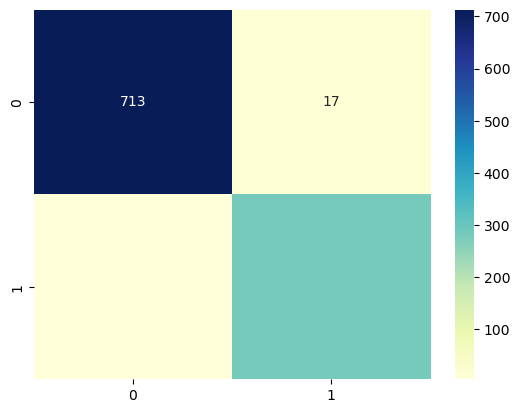

In [111]:
# Plot confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

Text(0.5, 0, 'Predicted label')

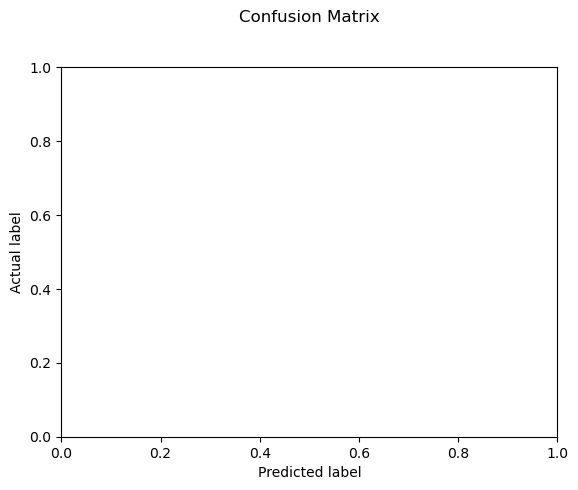

In [114]:
# Add labels to the plot
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [117]:
from sklearn.metrics import classification_report
target_names = ['No Default', 'Default']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  No Default       0.99      0.98      0.99       730
     Default       0.94      0.99      0.96       286

    accuracy                           0.98      1016
   macro avg       0.97      0.98      0.97      1016
weighted avg       0.98      0.98      0.98      1016



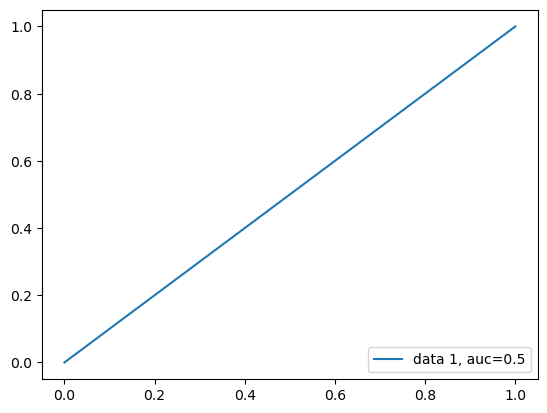

In [120]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [123]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample data
X = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]]
y = [0, 0, 1, 1, 0, 1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open('model.pkl', 'rb') as file:
    logreg_loaded = pickle.load(file)

# Make predictions
y_pred = logreg_loaded.predict(X_test_scaled)
print(y_pred)

[1 1]


In [126]:
# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [129]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the scaler
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Example new data
X_new = [[2, 3], [3, 4], [4, 5]]

# Scale the new data
X_new_scaled = loaded_scaler.transform(X_new)

# Make predictions
y_pred_new = loaded_model.predict(X_new_scaled)
print(y_pred_new)

[1 1 1]


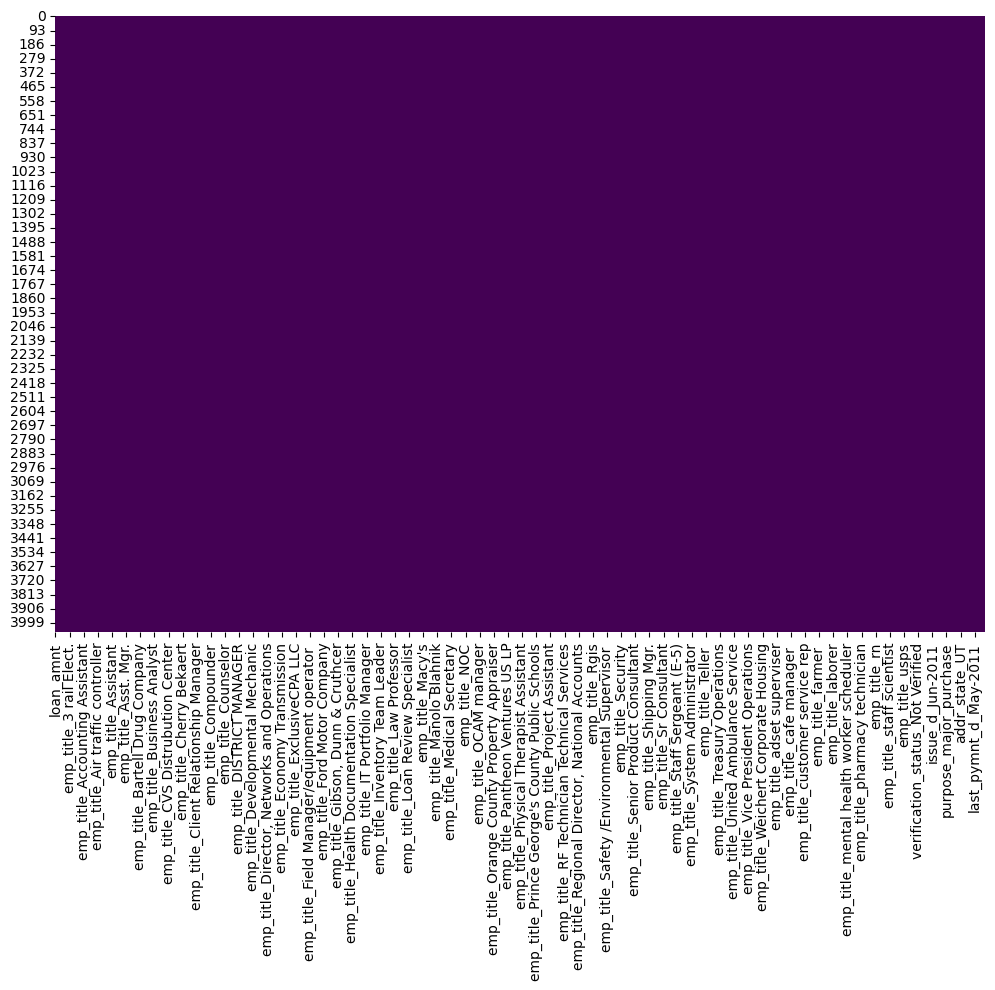

In [132]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_balanced.isnull(), cbar=False, cmap='viridis')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


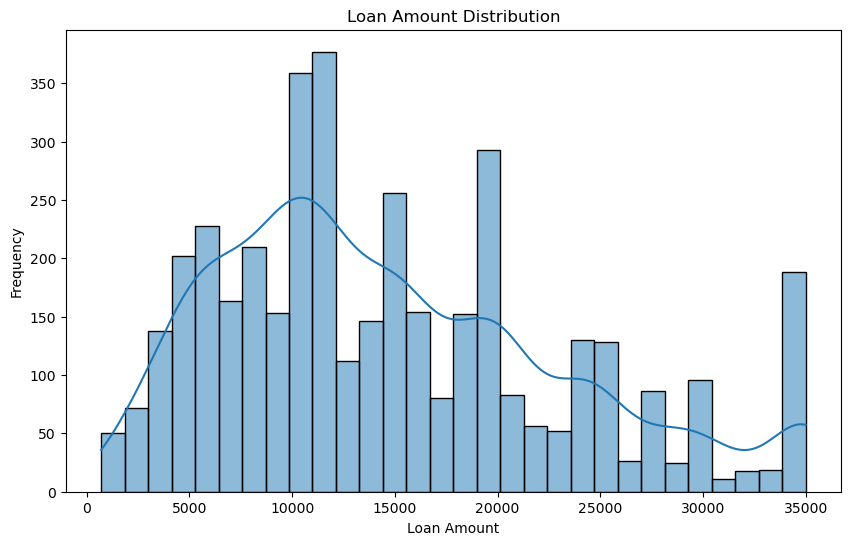

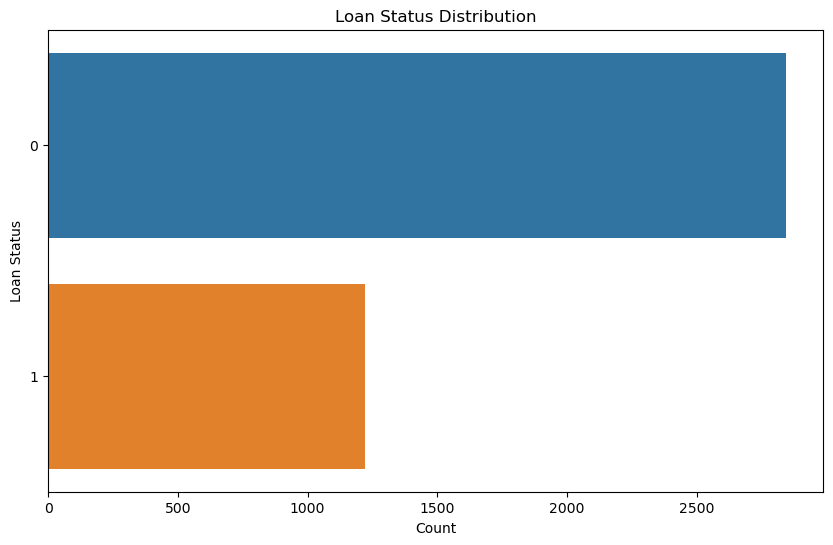

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


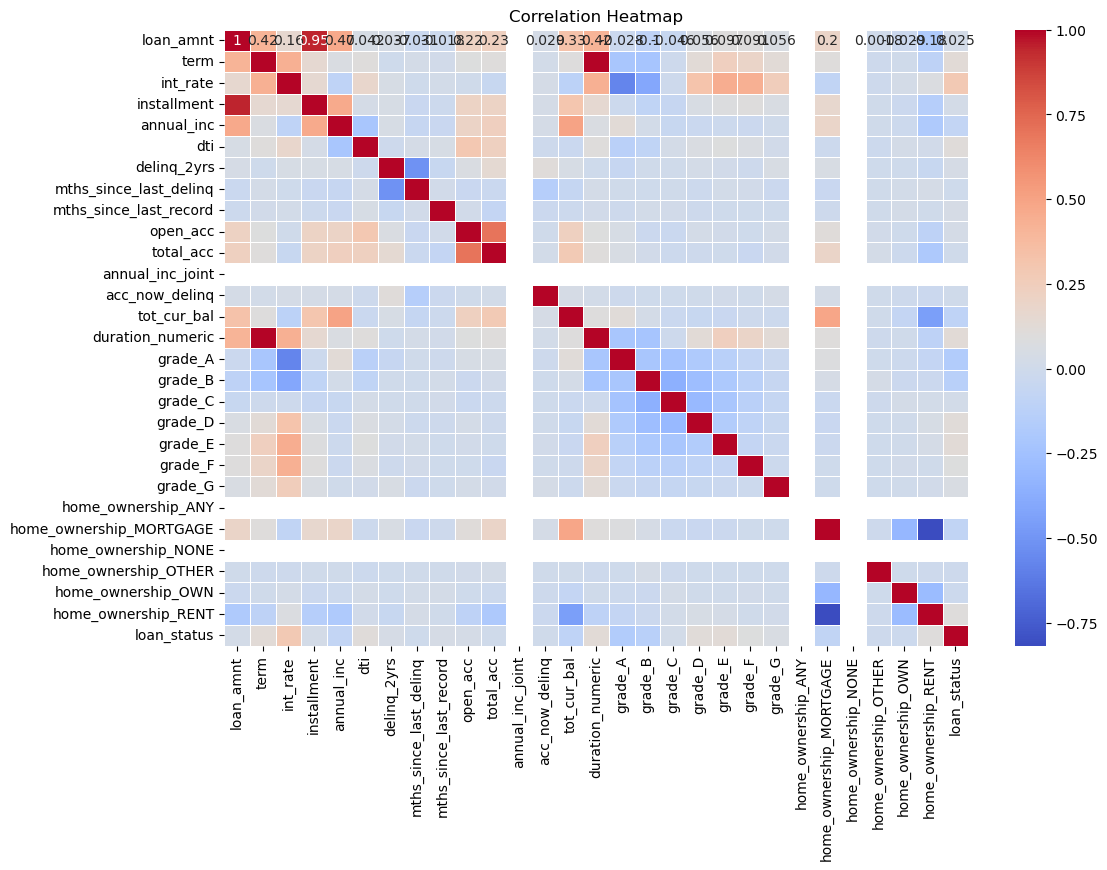

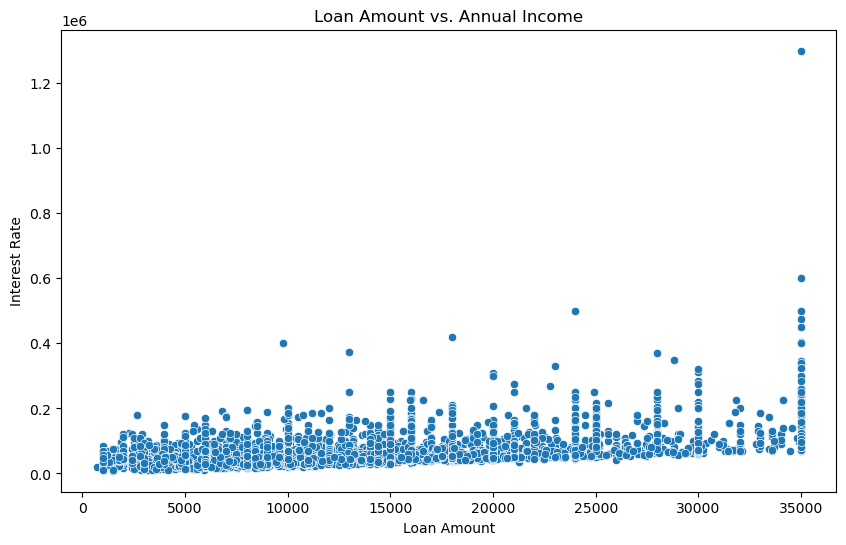

In [135]:
# Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_balanced['loan_amnt'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Loan Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', data=df_balanced, order=df_balanced['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()

# Correlation Heatmap (only for numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df_balanced.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Interest Rate vs. Loan Amount Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=df_balanced)
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

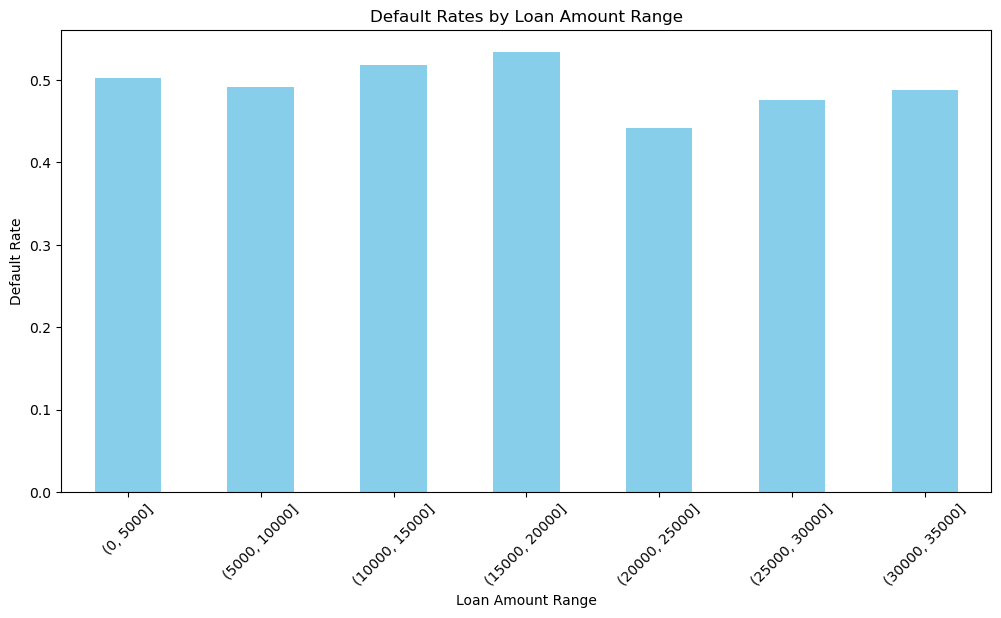

In [150]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_loans_2 = pd.read_csv('loans_balanced.csv', low_memory=False)

# Create bins for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = ['(0, 5000]', '(5000, 10000]', '(10000, 15000]', '(15000, 20000]', '(20000, 25000]', '(25000, 30000]', '(30000, 35000]']
df_loans_2['loan_amnt_range'] = pd.cut(df_loans_2['loan_amnt'], bins=bins, labels=labels)

# Calculate default rates (assuming loan_status '1' indicates default)
default_rates = df_loans_2.groupby('loan_amnt_range', observed=False)['loan_status'].mean()

# Bar plot of default rates by loan amount range
plt.figure(figsize=(12, 6))
default_rates.plot(kind='bar', color='skyblue')
plt.title('Default Rates by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

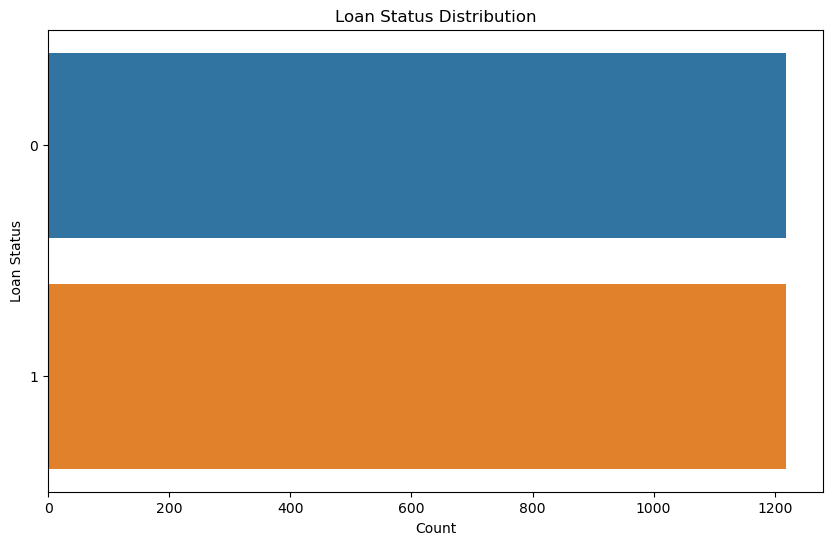

In [153]:
# Loan Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='loan_status', data=df_loans_2, order=df_loans_2['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.show()